In [1]:
!python --version

Python 3.7.10


In [2]:
import sys
import os
import requests
import subprocess
import shutil
from logging import getLogger, StreamHandler, INFO


logger = getLogger(__name__)
logger.addHandler(StreamHandler())
logger.setLevel(INFO)


def install(
        chunk_size=4096,
        file_name="Miniconda3-latest-Linux-x86_64.sh",
        url_base="https://repo.continuum.io/miniconda/",
        conda_path=os.path.expanduser(os.path.join("~", "miniconda")),
        rdkit_version=None,
        add_python_path=True,
        force=False):
    """install rdkit from miniconda
    ```
    import rdkit_installer
    rdkit_installer.install()
    ```
    """

    python_path = os.path.join(
        conda_path,
        "lib",
        "python{0}.{1}".format(*sys.version_info),
        "site-packages",
    )

    if add_python_path and python_path not in sys.path:
        logger.info("add {} to PYTHONPATH".format(python_path))
        sys.path.append(python_path)

    if os.path.isdir(os.path.join(python_path, "rdkit")):
        logger.info("rdkit is already installed")
        if not force:
            return

        logger.info("force re-install")

    url = url_base + file_name
    python_version = "{0}.{1}.{2}".format(*sys.version_info)

    logger.info("python version: {}".format(python_version))

    if os.path.isdir(conda_path):
        logger.warning("remove current miniconda")
        shutil.rmtree(conda_path)
    elif os.path.isfile(conda_path):
        logger.warning("remove {}".format(conda_path))
        os.remove(conda_path)

    logger.info('fetching installer from {}'.format(url))
    res = requests.get(url, stream=True)
    res.raise_for_status()
    with open(file_name, 'wb') as f:
        for chunk in res.iter_content(chunk_size):
            f.write(chunk)
    logger.info('done')

    logger.info('installing miniconda to {}'.format(conda_path))
    subprocess.check_call(["bash", file_name, "-b", "-p", conda_path])
    logger.info('done')

    logger.info("installing rdkit")
    subprocess.check_call([
        os.path.join(conda_path, "bin", "conda"),
        "install",
        "--yes",
        "-c", "rdkit",
        "python=={}".format(python_version),
        "rdkit" if rdkit_version is None else "rdkit=={}".format(rdkit_version)])
    logger.info("done")

    import rdkit
    logger.info("rdkit-{} installation finished!".format(rdkit.__version__))


if __name__ == "__main__":
    install()

add /root/miniconda/lib/python3.7/site-packages to PYTHONPATH
python version: 3.7.10
fetching installer from https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
done
installing miniconda to /root/miniconda
done
installing rdkit
done
rdkit-2020.09.1 installation finished!


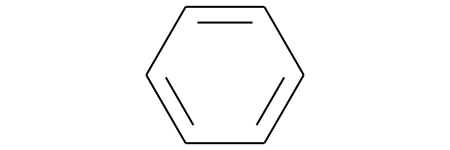

In [3]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

Chem.MolFromSmiles('c1ccccc1')

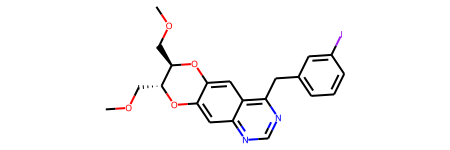

In [5]:
mol = Chem.MolFromSmiles('c12c(ncnc1Cc1cccc(c1)I)cc1c(c2)O[C@@H]([C@H](O1)COC)COC')
mol

In [6]:
#from rdkit import Chem
from rdkit.Chem import rdchem
#from rdkit.Chem import AllChem
import re

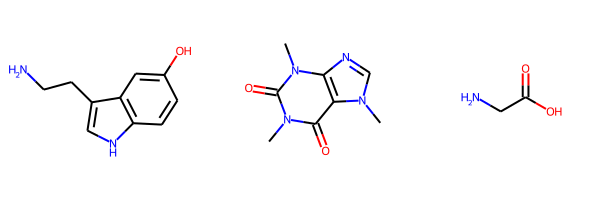

In [8]:
from rdkit.Chem import Draw

#serotonin https://en.wikipedia.org/wiki/Serotonin
#caffeine https://en.wikipedia.org/wiki/Caffeine
#glycine https://en.wikipedia.org/wiki/Glycine
#copy their smiles
smiles_list = ['C1=CC2=C(C=C1O)C(=CN2)CCN', 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C', 'C(C(=O)O)N']
mol_list = []
for smiles in smiles_list:
	mol = Chem.MolFromSmiles(smiles)
	mol_list.append(mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=len(mol_list))
img